In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [3]:
column_names = ["City", "Cloudiness (%)","Country",
                "Date","Humidity (%)","Latitude","Longitude",
                "Temperature (F)", "Wind Speed (mph)"]
cities_df = pd.DataFrame(columns=column_names)


cities_df.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (mph)


In [4]:
cities_df["City"]= cities
cities_df.head(10)

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (mph)
0,hilo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,santa cruz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ellisras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bairiki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,odugathur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,tuatapere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,lagoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,new norfolk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,punta arenas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "2f2ce2142c650c2e629355e66b97e530"
units = "imperial"



print("Beginning Data Retrieval")
print("-----------------------------")
count = 1

for index, row in cities_df.iterrows():
    city = row["City"]
    url = base_url + "appid=" + api_key + "&units=" + units + "&q=" + city
    
    try:
        response = requests.get(url).json()
        city_ID = response["id"]
        cities_df.loc[index, "Cloudiness (%)"]= response["clouds"]["all"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        cities_df.loc[index, "Humidity (%)"] = response["main"]["humidity"]
        cities_df.loc[index, "Latitude"] = response["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = response["coord"]["lon"]
        cities_df.loc[index, "Temperature (F)"] = response["main"]["temp"]
        cities_df.loc[index, "Wind Speed (mph)"] = response["wind"]["speed"]
        print(f"Processing record {count}   | {city}, ID: {city_ID}")
    except:
        print(f'{city} not found. Skipping...')
    count += 1
    


print("---------------------------------------")
print("Processing Complete")




Beginning Data Retrieval
-----------------------------
Processing record 1   | hilo, ID: 5855927
Processing record 2   | santa cruz, ID: 5393052
Processing record 3   | ellisras, ID: 1005768
bairiki not found. Skipping...
odugathur not found. Skipping...
Processing record 6   | tuatapere, ID: 2180815
Processing record 7   | lagoa, ID: 2267254
Processing record 8   | new norfolk, ID: 2155415
Processing record 9   | punta arenas, ID: 3874787
taolanaro not found. Skipping...
Processing record 11   | atuona, ID: 4020109
Processing record 12   | hermanus, ID: 3366880
Processing record 13   | saint-philippe, ID: 6138908
Processing record 14   | coruripe, ID: 3465329
barentsburg not found. Skipping...
Processing record 16   | mar del plata, ID: 3863379
grand river south east not found. Skipping...
Processing record 18   | paredon, ID: 3903987
Processing record 19   | kampot, ID: 1831112
Processing record 20   | necochea, ID: 3430443
Processing record 21   | semnan, ID: 116402
Processing recor

Processing record 179   | san patricio, ID: 3437029
Processing record 180   | pangnirtung, ID: 6096551
Processing record 181   | saint george, ID: 262462
Processing record 182   | rundu, ID: 3353383
mys shmidta not found. Skipping...
Processing record 184   | longyearbyen, ID: 2729907
Processing record 185   | northam, ID: 2641434
marcona not found. Skipping...
Processing record 187   | nuuk, ID: 3421319
Processing record 188   | niagara falls, ID: 6087892
Processing record 189   | dikson, ID: 1507390
Processing record 190   | pevek, ID: 2122090
Processing record 191   | shimoda, ID: 1852357
chagda not found. Skipping...
Processing record 193   | pasir gudang, ID: 1880252
Processing record 194   | coolum beach, ID: 2170581
Processing record 195   | setubal, ID: 3836277
Processing record 196   | raudeberg, ID: 3146487
saleaula not found. Skipping...
Processing record 198   | vachi, ID: 539511
Processing record 199   | vestmanna, ID: 2610343
Processing record 200   | chernyshevskiy, ID: 

Processing record 359   | shasta lake, ID: 5571109
ozgon not found. Skipping...
Processing record 361   | lida, ID: 626081
Processing record 362   | bacolod, ID: 1729564
Processing record 363   | magadan, ID: 2123628
Processing record 364   | lavrentiya, ID: 4031637
Processing record 365   | antalaha, ID: 1071296
Processing record 366   | port-cartier, ID: 6111696
Processing record 367   | losal, ID: 1264756
Processing record 368   | oktyabrskiy, ID: 515873
tubruq not found. Skipping...
Processing record 370   | quang ngai, ID: 1568770
Processing record 371   | college, ID: 5859699
Processing record 372   | malmo, ID: 5036359
Processing record 373   | marzuq, ID: 72181
Processing record 374   | nedjo, ID: 330120
Processing record 375   | bunia, ID: 217695
Processing record 376   | virginia beach, ID: 4791259
Processing record 377   | luwuk, ID: 1637001
Processing record 378   | wenatchee, ID: 5815342
Processing record 379   | uige, ID: 2236568
Processing record 380   | ternate, ID: 168

Processing record 535   | nantucket, ID: 4944903
Processing record 536   | kuryk, ID: 609919
Processing record 537   | ahipara, ID: 2194098
Processing record 538   | belyy yar, ID: 1510377
Processing record 539   | bucarasica, ID: 3688462
Processing record 540   | fort nelson, ID: 5955902
Processing record 541   | te anau, ID: 2181625
Processing record 542   | avera, ID: 4231997
Processing record 543   | buala, ID: 2109528
Processing record 544   | hongjiang, ID: 1808106
Processing record 545   | pingyin, ID: 1798632
Processing record 546   | port augusta, ID: 2063056
Processing record 547   | buta, ID: 217570
Processing record 548   | amarante do maranhao, ID: 3407755
Processing record 549   | gorom-gorom, ID: 2360372
Processing record 550   | langres, ID: 3007680
halalo not found. Skipping...
Processing record 552   | sao joao da barra, ID: 3448903
Processing record 553   | chabahar, ID: 1161724
Processing record 554   | angola, ID: 4917614
Processing record 555   | whitley bay, ID: 

In [6]:
cities_df.to_csv("Desktop/cities.csv", index=False)


(-60, 120)

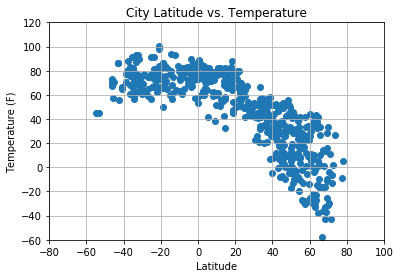

In [18]:
#Latitude vs. Temperature Plot
plt.scatter(cities_df["Latitude"],cities_df["Temperature (F)"])
plt.title(f"City Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])
plt.savefig("Temperature.png")

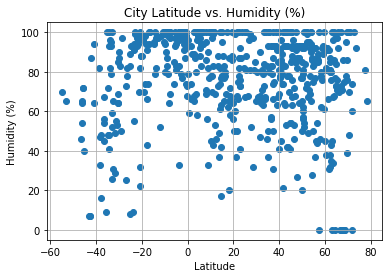

In [19]:
#Latitude vs. Humidity Plot
plt.scatter(cities_df["Latitude"],cities_df["Humidity (%)"])
plt.title(f"City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Humidity.png")

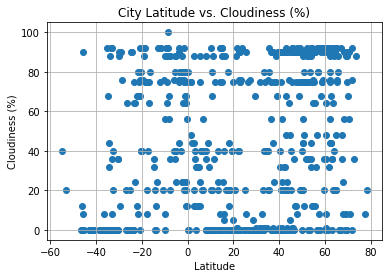

In [20]:
#Latitude vs. Cloudiness Plot
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness (%)"])
plt.title(f"City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloudiness.png")

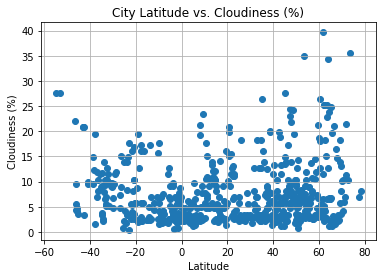

In [24]:
#Latitude vs. Wind Speed Plot
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed (mph)"])
plt.title(f"City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Wind_Speed.png")

# CONCLUSIONS
1. As you approach the equator, temperature increases.
2. The Southern Hemisphere is currently warmer than the Northern Hemisphere, presumably due to it being the SUmmer in the Southern Hemisphere and WInter in the Northern Hemisphere
3. Cloudiness, windspeed, and humidity do not seem to show a strong coorelation with latitude.